In [3]:
import sys
from matplotlib import pyplot as plt
import pathlib
import os.path

import glob
import os

# explicit import  
sys.path.append("./PyBaSiC/")
import pybasic


# Create a path to images from the DAPI channel


In [2]:
DAPI_path = '/home/jenna/NF1_SchwannCell_data/1.preprocessing_data/PyBaSiC_Pipelines/NF1_Channels/DAPI/'

# Image_names is splitting the name of the images from the "." and only keeping the beginning which is what identifies the cell and genotype
image_names = [fpath.split(".")[0] for fpath in os.listdir(DAPI_path)]
DAPI_images = pybasic.tools.load_data(DAPI_path, '.tif', verbosity = True)



0 / 32
10 / 32
20 / 32
30 / 32


# Run PyBaSiC to calculate the flatfield and darkfield

In [3]:
flatfield, darkfield = pybasic.basic(DAPI_images, darkfield=True)

reweighting_iter: 1


/home/jenna/NF1_SchwannCell_data/1.preprocessing_data/PyBaSiC_Pipelines/PyBaSiC/pybasic/tools/inexact_alm_rspca_l1.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  B1_offset = np.minimum(B1_offset, B1_uplimit / np.mean(W_idct_hat))


reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 6
reweighting_iter: 7
reweighting_iter: 8
reweighting_iter: 9
reweighting_iter: 10


# Displays the flatfield and darkfield that will be applied to the images

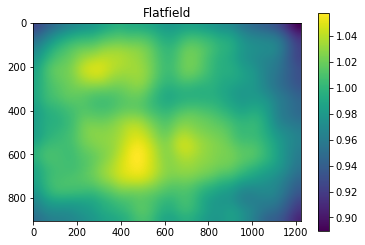

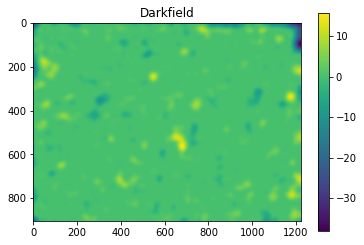

In [4]:
plt.title('Flatfield')
plt.imshow(flatfield)
plt.colorbar()
plt.show()
plt.title('Darkfield')
plt.imshow(darkfield)
plt.colorbar()
plt.show()

# Run illumination correction

In [5]:
DAPI_images_corrected = pybasic.correct_illumination(
    images_list = DAPI_images, 
    flatfield = flatfield, 
    darkfield = darkfield,
)

corr_images = zip(image_names, DAPI_images_corrected)


# Visual comparison of the orginal and corrected images

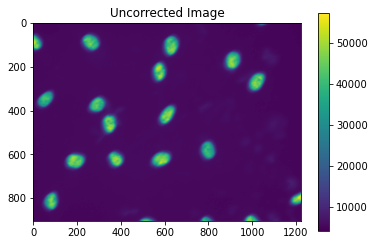

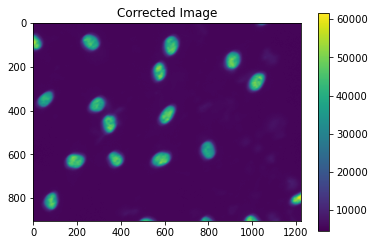

In [6]:
i = 0
plt.title('Uncorrected Image')
plt.imshow(DAPI_images[i])
plt.colorbar()
plt.show()
plt.title('Corrected Image')
plt.imshow(DAPI_images_corrected[i])
plt.colorbar()
plt.show()

# Use `for` loop that adds suffix to corrected images and downloads them

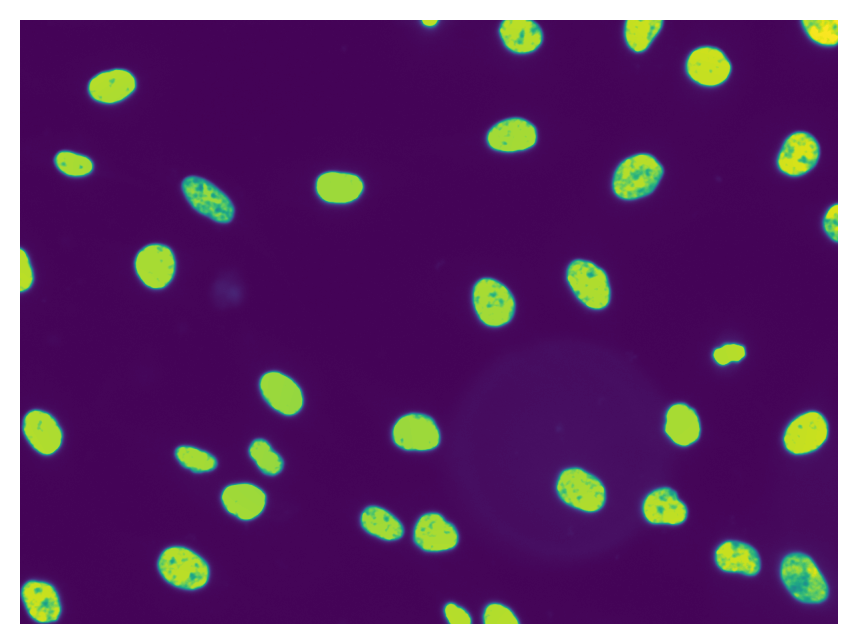

In [7]:
fig = plt.figure(dpi=200)

for fname, images in corr_images:
    name = f"../NF1_Channels/DAPI_Corrected/{fname}_IllumCorrected.tif"
    plt.imshow(images)
    plt.axis('off')
    plt.savefig(name)